KNN and DT - AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar,
            Andrew Smith,
            Christopher Lee,
            Alireza Bagheri,
            Musa Azim,
            Kuba Jerzmanowski
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


# Machine Learning in Python -  KNN and Decision Trees Workshop
<a href="https://www.scinbre.org/learning/bids-tutorials-and-workshops/2025-summer-workshops"> Bioinformatics/Data Science
Summer Workshops 2025 Link
</a>
### May 29th, 2025

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import (make_classification, load_iris, load_wine)

# First hour: K-Nearest Neighbors (KNN)

### What is KNN?
It is a supervised (needs labled data) learning algorithm used for both classification and regression. It works by identifying the "k" nearest data points to a new, unclassified point and making predictions based on the class or value of those neighbors.

The algorithm works in these steps:

1. **Store all training data** - Unlike other algorithms, KNN doesn't build a model during training. It simply stores all the data points with their labels.

2. **Calculate distances** - When making a prediction for a new data point, measure the distance between this point and every point in the training dataset.

3. **Find K nearest neighbors** - Identify the K data points with the smallest distances to your new point, where K is a number you choose (like 3, 5, or 10).

4. **Make prediction** - For classification, take the majority vote among these K neighbors. For regression, take the average of their values.

In [2]:
from sklearn.datasets import make_blobs

# Generate synthetic data representing plants
# Features: Leaf Length (cm), Stem Height (cm)
X_plants, y_ecosystem_numeric = make_blobs(
    n_samples=60,                # 30 plants from each ecosystem
    centers=[[10, 60], [4, 40]], # Ecosystem A: Taller plants, longer leaves; B: Shorter
    cluster_std=[4.0, 3.5],      # Natural variation in plant sizes
    n_features=2,
    random_state=42
)

# Convert numeric labels to ecosystem names
# y_ecosystem = np.array(['Rainforest' if label == 0 else 'Desert' for label in y_ecosystem_numeric])

In [3]:
y_ecosystem_numeric

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

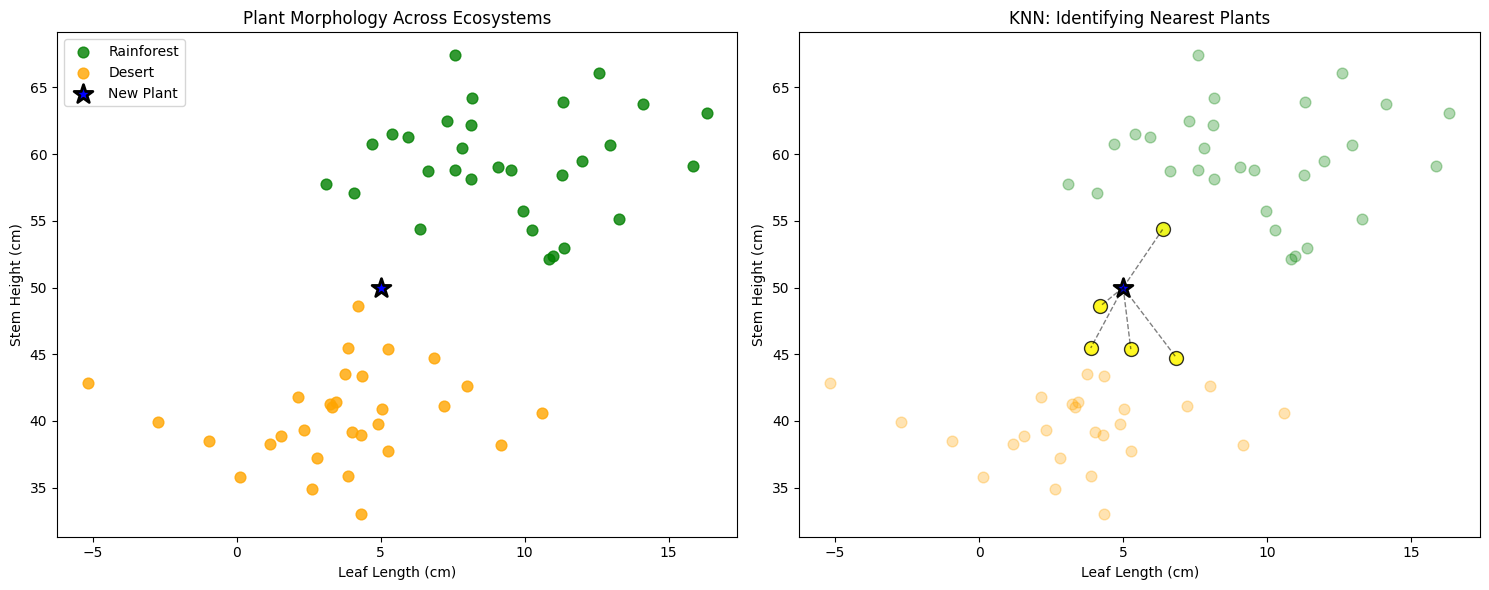

In [4]:
# SKIP THIS CODE BLOCK - Visualization only, no need to read or understand





# make a viz
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Plant morphology distribution
# colors = ['green' if label == 'Rainforest' else 'orange' for label in y_ecosystem]
rainforest = (y_ecosystem_numeric == 0)
ax[0].scatter(X_plants[rainforest, 0], X_plants[rainforest, 1], c='Green', alpha=0.8, s=60)
ax[0].scatter(X_plants[~rainforest, 0], X_plants[~rainforest, 1], c='Orange', alpha=0.8, s=60)

ax[0].set_xlabel('Leaf Length (cm)')
ax[0].set_ylabel('Stem Height (cm)')
ax[0].set_title('Plant Morphology Across Ecosystems')

# Add a new plant with unknown ecosystem
new_plant = [5, 50]
ax[0].scatter(new_plant[0], new_plant[1], c='blue', s=200, marker='*', edgecolors='black', linewidth=2, label='New Plant')
ax[0].legend(['Rainforest', 'Desert', 'New Plant'])

# Plot 2: Nearest neighbors to new plant
ax[1].scatter(X_plants[rainforest, 0], X_plants[rainforest, 1], c='Green', alpha=0.3, s=60)
ax[1].scatter(X_plants[~rainforest, 0], X_plants[~rainforest, 1], c='Orange', alpha=0.3, s=60)
ax[1].scatter(new_plant[0], new_plant[1], c='blue', s=200, marker='*', 
             edgecolors='black', linewidth=2)

# Compute distances and find 5 nearest neighbors
distances = np.sqrt(np.sum((X_plants - new_plant)**2, axis=1))
nearest_indices = np.argsort(distances)[:5]

# Highlight nearest neighbors
for i in nearest_indices:
    ax[1].scatter(X_plants[i, 0], X_plants[i, 1], c='yellow', s=100, alpha=0.8, edgecolors='black')
    ax[1].plot([new_plant[0], X_plants[i, 0]], [new_plant[1], X_plants[i, 1]], 'k--', alpha=0.5, linewidth=1)

ax[1].set_xlabel('Leaf Length (cm)')
ax[1].set_ylabel('Stem Height (cm)')
ax[1].set_title('KNN: Identifying Nearest Plants')

plt.tight_layout()
plt.show()


Out of the 5 closest points, 4 of them belong to the Desert class, so the KNN algorithm would classify the new plant as being from the Desert ecosystem with a probability of 4/5.

## Let's work with a real dataset: Wine classification

This dataset contains chemical analyses of wines grown in the same region in Italy but derived from three different cultivars.


In [5]:
wine_data = load_wine()
type(wine_data)

sklearn.utils._bunch.Bunch

In [6]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [7]:
X_wine = wine_data.data[:, :2]  # Use only first 2 features for visualization
y_wine = wine_data.target
feature_names = wine_data.feature_names[:2]
target_names = wine_data.target_names

print("Dataset Info:")
print(f"Features: {feature_names}")
print(f"Wine types: {target_names}")
print(f"Dataset shape: {X_wine.shape}")

Dataset Info:
Features: ['alcohol', 'malic_acid']
Wine types: ['class_0' 'class_1' 'class_2']
Dataset shape: (178, 2)


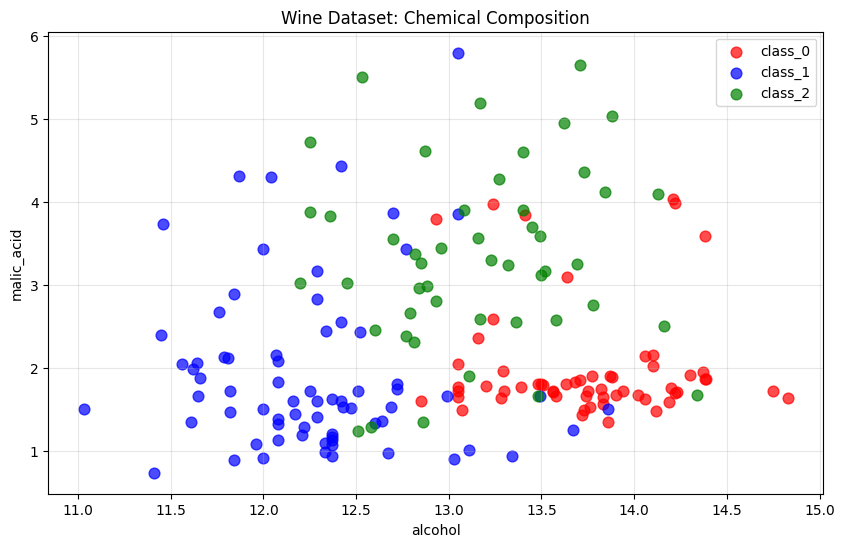

In [8]:
# Visualize the wine data
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i, wine_type in enumerate(target_names):
    mask = y_wine == i
    plt.scatter(X_wine[mask, 0], X_wine[mask, 1], c=colors[i], label=wine_type, alpha=0.7, s=60)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Wine Dataset: Chemical Composition')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [9]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

### Train/Test split: What? and Why?

Train-test split is a fundamental technique where you divide your dataset into two parts: 
- a training set to build your model 
-  a test set to evaluate it. 

You train your model using only the training data, then assess its performance on the completely separate test set to simulate how it will perform on new, unseen data in real-world deployment.

 This process is essential because it prevents overfitting (where models memorize training data instead of learning generalizable patterns), provides an unbiased estimate of model performance, and enables objective comparison between different algorithms or hyperparameters by testing them all on the same held-out data.

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 124
Test set size: 54


#### Why scaling matters:

KNN relies on distance calculations (like Euclidean distance) between points. If your features are on different scales (e.g., height in centimeters vs. income in dollars), the feature with the larger scale will dominate the distance computation.

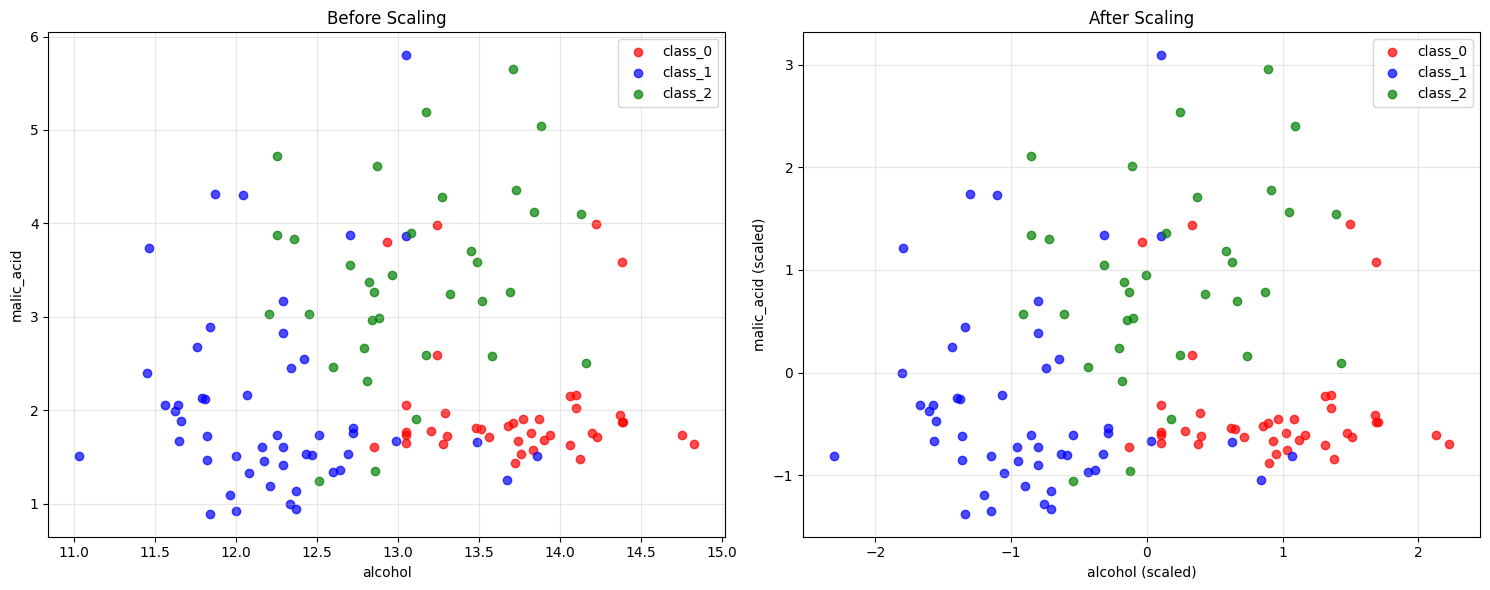

In [11]:
# SKIP THIS CODE BLOCK - Visualization only, no need to read or understand



fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before scaling
for i, wine_type in enumerate(target_names):
    mask = y_train == i
    axes[0].scatter(X_train[mask, 0], X_train[mask, 1], c=colors[i], label=wine_type, alpha=0.7)
axes[0].set_title('Before Scaling')
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# After scaling
for i, wine_type in enumerate(target_names):
    mask = y_train == i
    axes[1].scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1], c=colors[i], label=wine_type, alpha=0.7)
axes[1].set_title('After Scaling')
axes[1].set_xlabel(f'{feature_names[0]} (scaled)')
axes[1].set_ylabel(f'{feature_names[1]} (scaled)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Import the sklearn KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Experiment with different values of `k`

k= 1: Accuracy = 0.722
k= 2: Accuracy = 0.796
k= 3: Accuracy = 0.796
k= 4: Accuracy = 0.815
k= 5: Accuracy = 0.759
k= 6: Accuracy = 0.759
k= 7: Accuracy = 0.759
k= 8: Accuracy = 0.815
k= 9: Accuracy = 0.796
k=10: Accuracy = 0.796
k=11: Accuracy = 0.815
k=12: Accuracy = 0.778
k=13: Accuracy = 0.778
k=14: Accuracy = 0.778
k=15: Accuracy = 0.778
k=16: Accuracy = 0.778
k=17: Accuracy = 0.796
k=18: Accuracy = 0.796
k=19: Accuracy = 0.796
k=20: Accuracy = 0.778


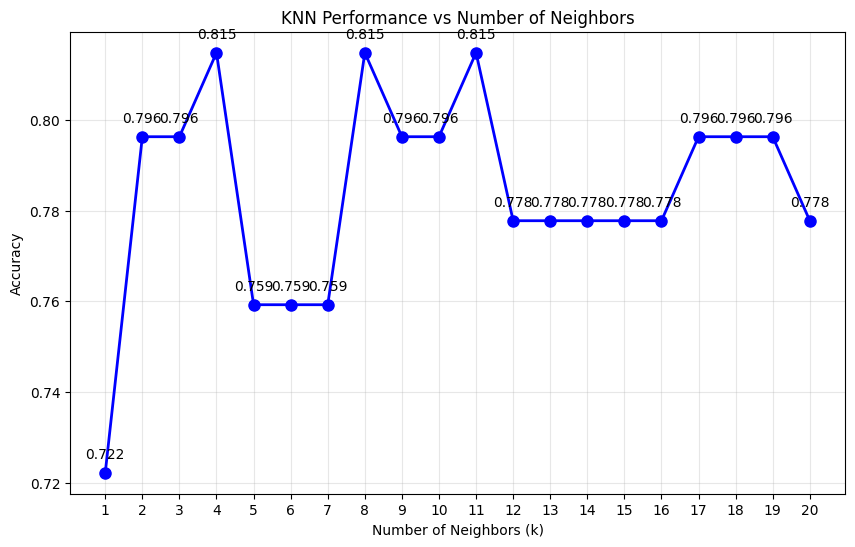

Best k value: 4 with accuracy: 0.815


In [13]:
k_values = range(1,21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k:2d}: Accuracy = {accuracy:.3f}")

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs Number of Neighbors')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
for i, (k, acc) in enumerate(zip(k_values, accuracies)):
    plt.annotate(f'{acc:.3f}', (k, acc), textcoords="offset points", 
                xytext=(0,10), ha='center')
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best k value: {best_k} with accuracy: {max(accuracies):.3f}")


These results seem strange. Keep in mind that we're only classifying based on 2 out of the 13 features available for prediction.

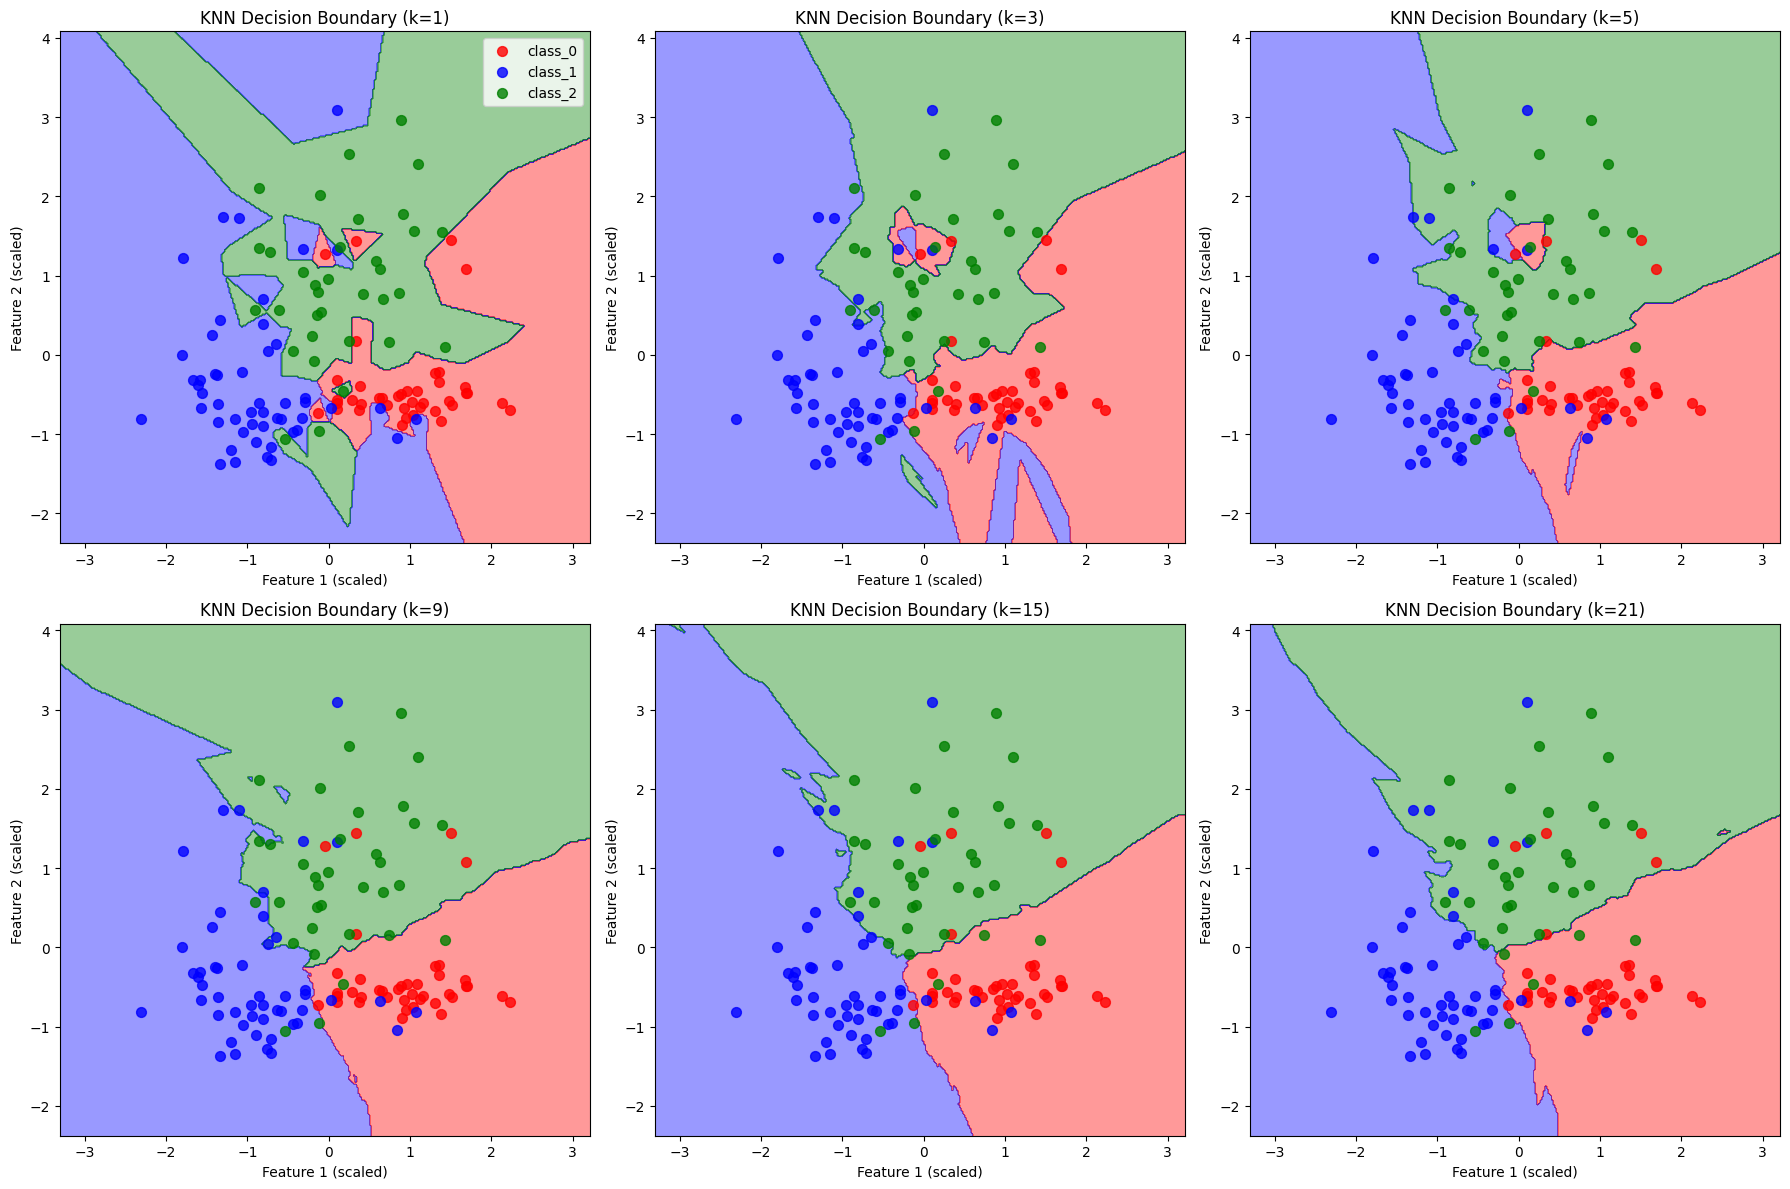

 Observations:
• k=1: Very complex boundary, might overfit
• k=3-5: Good balance, smooth but responsive
• k>15: Very smooth, might underfit


In [14]:
# SKIP THIS CODE BLOCK - Visualization only, no need to read or understand



from matplotlib.colors import LinearSegmentedColormap

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

k_showcase = [1, 3, 5, 9, 15, 21]

for idx, k in enumerate(k_showcase):
    # Train KNN with specific k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Create decision boundary
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


    cmap = LinearSegmentedColormap.from_list('red_yellow_blue', ['red', 'blue', 'green'], N=5)
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    
    # Plot training points
    for i, wine_type in enumerate(target_names):
        mask = y_train == i
        axes[idx].scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1], c=colors[i], label=wine_type, alpha=0.8, s=50)
    
    axes[idx].set_title(f'KNN Decision Boundary (k={k})')
    axes[idx].set_xlabel('Feature 1 (scaled)')
    axes[idx].set_ylabel('Feature 2 (scaled)')
    if idx == 0:
        axes[idx].legend()

plt.tight_layout()
plt.show()

print(" Observations:")
print("• k=1: Very complex boundary, might overfit")
print("• k=3-5: Good balance, smooth but responsive")
print("• k>15: Very smooth, might underfit")

Train final model with best `k`:

In [15]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_final = final_knn.predict(X_test_scaled)

In [16]:
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay) 

 Final KNN Performance Report
Best k value: 4
Test Accuracy: 0.815

Detailed Classification Report:
              precision    recall  f1-score   support

     class_0       0.77      0.89      0.83        19
     class_1       0.94      0.81      0.87        21
     class_2       0.71      0.71      0.71        14

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.82      0.81      0.82        54



<Figure size 800x600 with 0 Axes>

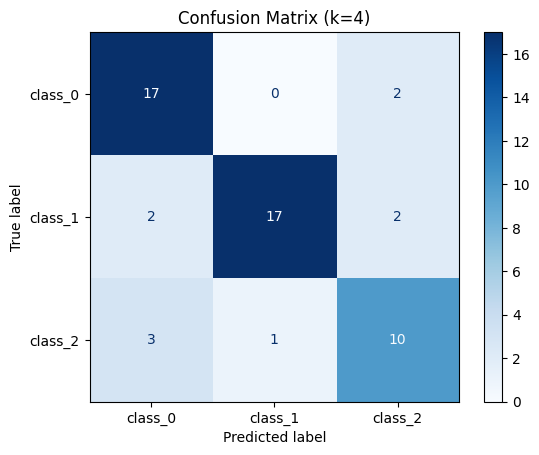

In [17]:
# Show performance metrics
print(" Final KNN Performance Report")
print("=" * 40)
print(f"Best k value: {best_k}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_final):.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_final, target_names=target_names))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()

###  KNN Strengths and Limitations

**Strengths:**
- Simple and intuitive
- No assumptions about data distribution
- Works well with sufficient data
- Can capture complex decision boundaries

**Limitations:**
- Sensitive to irrelevant features
- Computationally expensive for large datasets
- Sensitive to local structure of data
- Requires careful choice of k

## Hour 1 Exercise: 

Now that you have a basic understanding of scikit-learn, try the following exercise:

1. Load the Iris dataset using scikit-learn. ` iris.data  # Features` `iris.target  # Target labels`

In [18]:
# Load the Iris dataset
iris = load_iris()



2. Split the data into training and testing sets.


In [19]:
# Split the data into training and testing sets


3. Train a KNN classifier on the training data. 


In [20]:
# Create and train the Decision Tree model


4. Make predictions on the testing data.

In [21]:
# Make predictions


5. Evaluate the model's performance using accuracy, precision (sklearn.metrics.precision_score), and recall (sklearn.metrics.recall_score).

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [24]:
# Evaluate the model
accuracy = 0
precision = 0
recall = 0

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

Accuracy: 0.00%
Precision: 0.00%
Recall: 0.00%


---


# Second hour: Decision Trees and Random Forests

## What is a Decision Tree?

A decision tree is a flowchart-like structure used to make decisions or predictions based on data. It splits data into branches using a series of if-then rules, where each internal node represents a decision based on a feature, each branch represents an outcome, and each leaf node represents a final decision or prediction.

The Vacation Planning Analogy: 

Imagine you're trying to decide where to go on vacation. You go through a sequence of questions:

1. Start with the big picture – Do I want to stay in the country or travel abroad?

2. Narrow it down – If abroad, do I prefer beaches or mountains?

3. Keep refining – If beaches, is my budget high or low?

4. Arrive at a decision – Based on the answers, you might choose "Thailand" or "Spain" or "staycation."

This step-by-step filtering mirrors how a decision tree splits data to arrive at a final outcome.

In [ ]:
# Generate synthetic public health intervention data
X_interventions_raw, y_interventions_raw = make_classification(
    n_samples=1000,         # 1000 public health interventions
    n_features=4,           # Funding, Target Risk, Reach, Implementation Quality
    n_informative=2,        # All features matter
    n_redundant=0,
    n_classes=2,            # Effective vs Not Effective
    n_clusters_per_class=1,
    class_sep=1.5,          # Moderate difficulty to separate
    flip_y=0.1,             # 10% label noise (real-world messiness)
    weights=[0.4, 0.6],     # 40% effectiveness rate
    random_state=42
)

# Transform features to realistic public health values
X_interventions = X_interventions_raw.copy()
X_interventions

In [ ]:
# Feature 0: Funding (in $100k units) - Transform to $100k to $2M
X_interventions[:, 0] = (X_interventions[:, 0] - X_interventions[:, 0].min()) / (X_interventions[:, 0].max() - X_interventions[:, 0].min())
X_interventions[:, 0] = X_interventions[:, 0] * 1.9 + 0.1  # 0.1 to 2.0 ($100k to $2M)

# Feature 1: Target Risk Level (0 to 100) - Higher is riskier population
X_interventions[:, 1] = (X_interventions[:, 1] - X_interventions[:, 1].min()) / (X_interventions[:, 1].max() - X_interventions[:, 1].min())
X_interventions[:, 1] = X_interventions[:, 1] * 100

# Feature 2: Reach (in thousands of people) - Transform to 1k to 100k
X_interventions[:, 2] = (X_interventions[:, 2] - X_interventions[:, 2].min()) / (X_interventions[:, 2].max() - X_interventions[:, 2].min())
X_interventions[:, 2] = X_interventions[:, 2] * 99 + 1

# Feature 3: Implementation Quality (1 to 10 scale)
X_interventions[:, 3] = (X_interventions[:, 3] - X_interventions[:, 3].min()) / (X_interventions[:, 3].max() - X_interventions[:, 3].min())
X_interventions[:, 3] = X_interventions[:, 3] * 9 + 1

# Binary target: was the intervention effective?
y_interventions = y_interventions_raw

# Create DataFrame for analysis
features = ['Funding_$100k', 'Target_Risk_Level', 'Reach_1kPeople', 'Implementation_Quality']
interventions_df = pd.DataFrame(X_interventions, columns=features)
interventions_df['Effective'] = y_interventions

print("Public Health Intervention Dataset:")
print(f"Total interventions: {len(interventions_df)}")
print(f"Features: {features}")
print(f"Effectiveness rate: {y_interventions.mean():.1%}")
print(f"Dataset shape: {interventions_df.shape}")
print(f"\nFirst 10 interventions:")
print(interventions_df.head(10))

# Show feature ranges
print(f"\nFeature ranges:")
for feature in features:
    print(f"  {feature}: {interventions_df[feature].min():.1f} - {interventions_df[feature].max():.1f}")


| Feature Name | Description |
|--------------|-------------|
| **Funding_$100k** | The total funding allocated to the intervention, in hundreds of thousands of dollars.<br>Range: $100,000 to $2,000,000.<br>Example: A value of 1.5 = $1,500,000. |
| **Target_Risk_Level** | A score from 0 to 100 representing how high-risk the target population is.<br>Higher values mean the population is more vulnerable (e.g., due to socioeconomic status, comorbidities, or lack of access to care). |
| **Reach_1kPeople** | How many people the intervention reaches, in thousands.<br>Range: 1,000 to 100,000 people.<br>Example: A value of 20 = 20,000 people impacted. |
| **Implementation_Quality** | A subjective or evaluated score from 1 to 10 reflecting how well the intervention was implemented.<br>Could be based on staff training, adherence to protocols, or infrastructure readiness.<br>Higher is better. |

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

features = ['Funding_$100k', 'Target_Risk_Level', 'Reach_1kPeople', 'Implementation_Quality']
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    
    # Separate effective and ineffective interventions
    effective_data = interventions_df[interventions_df['Effective'] == 1][feature]
    ineffective_data = interventions_df[interventions_df['Effective'] == 0][feature]
    
    ax.hist(ineffective_data, alpha=0.6, label='Not Effective', bins=30, color='red')
    ax.hist(effective_data, alpha=0.6, label='Effective', bins=30, color='green')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Prepare data
features = ['Funding_$100k', 'Target_Risk_Level', 'Reach_1kPeople', 'Implementation_Quality']
X_health = interventions_df[features].values
y_health = interventions_df['Effective'].values

In [ ]:
# Split the data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_health, y_health, test_size=0.3, random_state=42, stratify=y_health
)

print(f"Training X: {X_train_dt.shape}      Training y: {y_train_dt.shape}")
print(f"Test X: {X_test_dt.shape}      Test y: {y_test_dt.shape}") 

In [ ]:
# Build a simple decision tree
from sklearn.tree import DecisionTreeClassifier
dt_simple = DecisionTreeClassifier(max_depth=3, random_state=42)

**Max Depth**: is a hyperparameter that limits how deep a decision tree can grow by restricting the maximum number of levels from root to leaf. 
- A depth of 1 means only one split (root and two leaves)
- A depth of 5 allows up to 5 consecutive decision points. 
- This parameter controls the trade-off between model complexity and generalization 
    - shallow trees (low max depth) are simple but may underfit
    -  deep trees (high max depth) can capture complex patterns but risk overfitting by memorizing training data noise

In [ ]:
# Training the tree on data
dt_simple.fit(X_train_dt, y_train_dt)

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(
    dt_simple, 
    feature_names=features,
    class_names=['Not Effective', 'Effective'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Public Health Intervention Decision Tree\n(Synthetic Data)', fontsize=16)
plt.show()

In [ ]:
# Evaluate performance
y_pred_dt = dt_simple.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)

print(f"Decision Tree Performance:")
print(f"Accuracy: {accuracy_dt:.3f}")
print("\nClassification Report:")
print(classification_report(y_test_dt, y_pred_dt, target_names=['Not Effective', 'Effective']))

In [ ]:
depths = [1, 2, 3, 5, 10, 15, None]  # None means no limit
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_dt, y_train_dt)
    
    train_acc = accuracy_score(y_train_dt, dt.predict(X_train_dt))
    test_acc = accuracy_score(y_test_dt, dt.predict(X_test_dt))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    depth_str = str(depth) if depth is not None else "Unlimited"
    print(f"Depth {depth_str:>9}: Train={train_acc:.3f}, Test={test_acc:.3f}")

# Plot the bias-variance tradeoff
plt.figure(figsize=(12, 8))
x_pos = range(len(depths))
depth_labels = [str(d) if d is not None else "∞" for d in depths]

plt.subplot(2, 1, 1)
plt.plot(x_pos, train_accuracies, 'bo-', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(x_pos, test_accuracies, 'ro-', label='Testing Accuracy', linewidth=2, markersize=8)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Testing Performance')
plt.xticks(x_pos, depth_labels)
plt.legend()
plt.grid(True, alpha=0.3)

# Show overfitting
plt.subplot(2, 1, 2)
overfitting = np.array(train_accuracies) - np.array(test_accuracies)
plt.bar(x_pos, overfitting, color=['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in overfitting])
plt.xlabel('Tree Depth')
plt.ylabel('Overfitting (Train - Test)')
plt.title('Overfitting Analysis')
plt.xticks(x_pos, depth_labels)
plt.axhline(y=0.05, color='orange', linestyle='--', label='Moderate Overfitting')
plt.axhline(y=0.1, color='red', linestyle='--', label='High Overfitting')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Insights:
- Shallow trees: High bias, low variance (underfitting)
- Deep trees: Low bias, high variance (overfitting)
- Sweet spot: Balance between bias and variance

## Random Forests: Wisdom of the Academic Committee

### The Peer Review Analogy

Instead of relying on one reviewer, journals use multiple reviewers. Random Forest works similarly:
- Build many decision trees (reviewers)
- Each tree sees a random subset of data and features  
- Final decision is based on majority vote
- More robust than single decision


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Let's see this in action with our funding data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_dt, y_train_dt)

# Compare single tree vs random forest
dt_best = DecisionTreeClassifier(max_depth=5, random_state=42)  # Best depth from above
dt_best.fit(X_train_dt, y_train_dt)

In [ ]:
# Predictions
dt_pred = dt_best.predict(X_test_dt)
rf_pred = rf_model.predict(X_test_dt)

In [ ]:
# Performance comparison
print(" Single Decision Tree vs  Random Forest")
print("=" * 50)
print(f"Decision Tree Accuracy: {accuracy_score(y_test_dt, dt_pred):.3f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test_dt, rf_pred):.3f}")


**Feature Importance**: measures how much each input variable contributes to a model's predictions, typically expressed as scores that sum to 100% or 1.0. 

It identifies which features have the strongest influence on the model's decision-making process.

In [ ]:
# Get teh feature importacne 
dt_best.feature_importances_

In [ ]:
# SKIP THIS CODE BLOCK - Visualization only, no need to read or understand




fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion matrices
cm_dt = confusion_matrix(y_test_dt, dt_pred)
cm_rf = confusion_matrix(y_test_dt, rf_pred)

disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Funded', 'Funded'])
disp_dt.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree\nConfusion Matrix')

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Funded', 'Funded'])
disp_rf.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Random Forest\nConfusion Matrix')

# Feature importance comparison
feature_importance_dt = dt_best.feature_importances_
feature_importance_rf = rf_model.feature_importances_

x_pos = np.arange(len(features))
width = 0.35

axes[2].bar(x_pos - width/2, feature_importance_dt, width, label='Decision Tree', alpha=0.7)
axes[2].bar(x_pos + width/2, feature_importance_rf, width, label='Random Forest', alpha=0.7)
axes[2].set_xlabel('Features')
axes[2].set_ylabel('Importance')
axes[2].set_title('Feature Importance Comparison')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(features, rotation=45)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show individual tree predictions (first 5 trees)
print("Individual Tree Predictions (Sample):")
sample_idx = 42
sample_data = X_test_dt[sample_idx:sample_idx+1]
actual_label = y_test_dt[sample_idx]

tree_predictions = []
for i in range(min(10, rf_model.n_estimators)):
    tree_pred = rf_model.estimators_[i].predict(sample_data)[0]
    tree_predictions.append(tree_pred)

print(f"Sample prediction for test case {sample_idx}:")
print(f"Actual: {'Funded' if actual_label else 'Not Funded'}")
print(f"Individual trees: {tree_predictions}")
print(f"Majority vote: {'Funded' if sum(tree_predictions) > len(tree_predictions)/2 else 'Not Funded'}")
print(f"RF Prediction: {'Funded' if rf_model.predict(sample_data)[0] else 'Not Funded'}")


###  Final Reflection: When to Use Each Algorithm

**Decision Trees - Best for:**
- Interpretability is crucial
- Small to medium datasets
- Mixed data types (numerical and categorical)
- Understanding decision logic
- Quick prototyping

**Random Forests - Best for:**
- Higher accuracy is priority
- Large datasets
- Robust predictions needed
- Feature importance analysis
- Handling overfitting

**KNN - Best for:**
- Simple, intuitive approach
- Non-linear relationships
- Local patterns matter
- Anomaly detection
- Recommendation systems


###  **Common Pitfalls:**
- Not scaling features for KNN
- Overfitting with deep decision trees
- Ignoring class imbalance
- Not validating on held-out data
- Over-interpreting feature importance

## Hour 2 Exercise: 

We will build models to predict if a student will graduate based on features like GPA, SAT score, income, and more.

In [ ]:
# Simulate student data
X_raw, y = make_classification(
    n_samples=2000,
    n_features=4,
    n_informative=3,
    n_redundant=1,
    class_sep=0.4,
    n_classes=2,
    weights=[0.25, 0.75],  # 75% graduate
    random_state=456
)

# Transform features to realistic values
X = X_raw.copy()
X[:, 0] = (X[:, 0] - X[:, 0].min()) / (X[:, 0].max() - X[:, 0].min()) * 2 + 2       # GPA: 2.0–4.0
X[:, 1] = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:, 1].min()) * 800 + 800   # SAT: 800–1600
X[:, 2] = (X[:, 2] - X[:, 2].min()) / (X[:, 2].max() - X[:, 2].min()) * 45 + 5      # Study Hours
X[:, 3] = (X[:, 3] - X[:, 3].min()) / (X[:, 3].max() - X[:, 3].min()) * 30          # Social Hours

# Create DataFrame
columns = ['GPA', 'SAT', 'StudyHours', 'SocialHours']
students = pd.DataFrame(X, columns=columns)
students['Graduated'] = y
students.head()

1. Split the data

2. Train a Decision Tree

In [26]:
# Decision Tree


# Accuracy

3. Train a Random Forest

In [27]:
# Random Forest



# Homework:

Ensure you grasp all the material, particularly the algorithms and their potential pitfalls. If anything is unclear, come back to office hours for clarification.